In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import glob
import pyswarm

In [2]:
%matplotlib inline

In [3]:
datasets = []
for filename in glob.glob('data_for_peter/*.csv'):
    data = pandas.read_csv(filename, sep=',', header=None,
                           index_col=0, usecols=range(8),
                           names=('index','DATE', 'TIME', 'CO2', 'O2', 'Temp', 'Humidity', 'Pressure'),
                           skiprows=1)
    datasets.append(data)

In [4]:
data.iloc[:10]

,DATE,TIME,CO2,O2,Temp,Humidity,Pressure
index,,,,,,,
1,11-25-2015,12:51:00,533,21,29.6,41.6,1006
2,11-25-2015,12:51:10,532,21,29.6,41.6,1006
3,11-25-2015,12:51:20,534,21,29.6,41.6,1006
4,11-25-2015,12:51:30,533,21,29.6,41.6,1006
5,11-25-2015,12:51:40,532,21,29.6,41.6,1006
6,11-25-2015,12:51:50,531,21,29.6,41.6,1006
7,11-25-2015,12:52:00,528,21,29.6,41.6,1006
8,11-25-2015,12:52:10,528,21,29.6,41.6,1006
9,11-25-2015,12:52:20,527,21,29.6,41.6,1006


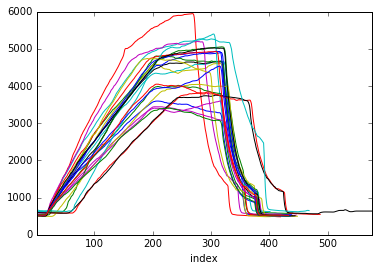

In [5]:
plt.figure()
for data in datasets:
    data['CO2'].plot()


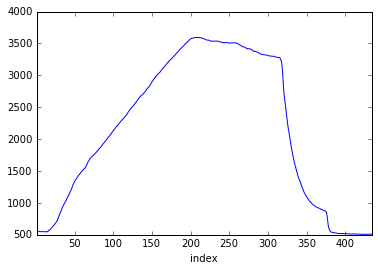

In [6]:
plt.figure()
datasets[0]['CO2'].plot()

In [7]:
data = datasets[0]
print(len(data))

434


In [8]:
def curve(x_range, a1, a2, A, b1, b2, B, c1, c2, C, d1, d2, D, e1, e2, E, f1, f2):
#     print((a1, a2, A, b1, b2, B, c1, c2, C, d1, d2, D, e1, e2, E, f1, f2))
    results = []
    for x in x_range:
        if x <= A:
            y = a1*x + a2
        elif x > A and x <= B:
            y = b1*(x - A) + b2
        elif x > B and x <= C:
            y = c1*(x - B) + c2
        elif x > C and x <= D:
            y = (d1*(x-D))**2 + d2
        elif x > D and x <= E:
            y = e1*(x - D) + e2
        elif x > E:
            y = f1*(x - E) + f2
        results.append(y)
    return results

In [9]:
sim_data = curve(range(len(data)),
                  a1=0, a2=500, A=20,
                  b1=15, b2=500, B=180,
                  c1=-0.5, c2=3500, C=310,
                  d1=0.7, d2=1000, D=380,
                  e1=-2, e2=1500, E=390,
                  f1=1, f2=100)
print(sim_data)

[500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 515, 530, 545, 560, 575, 590, 605, 620, 635, 650, 665, 680, 695, 710, 725, 740, 755, 770, 785, 800, 815, 830, 845, 860, 875, 890, 905, 920, 935, 950, 965, 980, 995, 1010, 1025, 1040, 1055, 1070, 1085, 1100, 1115, 1130, 1145, 1160, 1175, 1190, 1205, 1220, 1235, 1250, 1265, 1280, 1295, 1310, 1325, 1340, 1355, 1370, 1385, 1400, 1415, 1430, 1445, 1460, 1475, 1490, 1505, 1520, 1535, 1550, 1565, 1580, 1595, 1610, 1625, 1640, 1655, 1670, 1685, 1700, 1715, 1730, 1745, 1760, 1775, 1790, 1805, 1820, 1835, 1850, 1865, 1880, 1895, 1910, 1925, 1940, 1955, 1970, 1985, 2000, 2015, 2030, 2045, 2060, 2075, 2090, 2105, 2120, 2135, 2150, 2165, 2180, 2195, 2210, 2225, 2240, 2255, 2270, 2285, 2300, 2315, 2330, 2345, 2360, 2375, 2390, 2405, 2420, 2435, 2450, 2465, 2480, 2495, 2510, 2525, 2540, 2555, 2570, 2585, 2600, 2615, 2630, 2645, 2660, 2675, 2690, 2705, 2720, 2735, 2750, 2765, 2780, 2795, 2810, 282

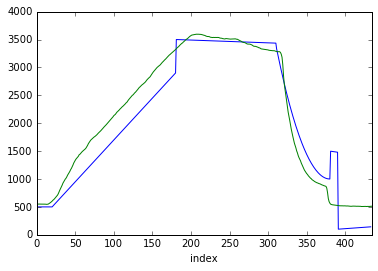

In [10]:
plt.figure()
plt.plot(sim_data)
data['CO2'].plot()

In [11]:
data['CO2'].index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            425, 426, 427, 428, 429, 430, 431, 432, 433, 434],
           dtype='int64', name='index', length=434)

In [12]:
def leastsq(func, data,):
    error = 0
    for x, y in enumerate(data):
        y2 = func(x)
        error += (y - y2)**2

In [13]:
from functools import partial

In [14]:
y_list = list(data['CO2'])

In [15]:
def curve2(params, *args):
    (a1, a2, A, b1, b2, B, c1, c2, C, d1, d2, D, e1, e2, E, f1, f2) = params
    data = args
    error_sum = 0
    for i, x in enumerate(range(len(data))):
        if x <= A:
            y = a1*x + a2
        elif x > A and x <= B:
            y = b1*(x - A) + b2
        elif x > B and x <= C:
            y = c1*(x - B) + c2
        elif x > C and x <= D:
            y = (d1*(x-D))**2 + d2           
#             y = d1*(x - C) + d2
        elif x > D and x <= E:
            y = e1*(x - D) + e2
        elif x > E:
            y = f1*(x - E) + f2
        error_sum += (data[i] - y)**2
    return error_sum

In [16]:
data['CO2'].iloc[0]

551.0

In [17]:
#               a1  a2  A
lower_bounds = (0.5, 500, 10,
#               b1  b2  B
                10, 500, 180,
#               c1  c2  C
                -2, 3300, 310,
#               d1  d2  D
                1, 1000, 360,
#               e1  e2  E
                -20, 500, 360,
#               f1  f2
                0.5, 500
               )

In [18]:
#               a1  a2  A
upper_bounds = (1.5, 550, 40,
#               b1  b2  B
                20, 600, 220,
#               c1  c2  C
                0, 3700, 350,
#               d1  d2  D
                2, 2000, 390,
#               e1  e2  E
                -5, 600, 400,
#               f1  f2
                1.5, 600
               )

In [19]:
optimal_params, min_error = pyswarm.pso(func=curve2, lb=lower_bounds, ub=upper_bounds, args=(y_list))

Stopping search: maximum iterations reached --> 100


In [20]:
print(optimal_params)

[  5.01466463e-01   5.25216510e+02   1.00072131e+01   1.70917728e+01
   5.49622978e+02   1.81227481e+02  -1.92854202e-01   3.46591448e+03
   3.12542985e+02   1.00000000e+00   1.00000000e+03   3.60566957e+02
  -5.00000000e+00   5.91133489e+02   3.77954163e+02   9.54191713e-01
   5.40314422e+02]


In [21]:
def curve2_vals(params, *args):
    (a1, a2, A, b1, b2, B, c1, c2, C, d1, d2, D, e1, e2, E, f1, f2) = params
    data = args[0]
    results = []
    for i, x in enumerate(range(len(data))):
        if x <= A:
            y = a1*x + a2
        elif x > A and x <= B:
            y = b1*(x - A) + b2
        elif x > B and x <= C:
            y = c1*(x - B) + c2
        elif x > C and x <= D:
            y = (d1*(x-D))**2 + d2           
#             y = d1*(x - C) + d2
        elif x > D and x <= E:
            y = e1*(x - D) + e2
        elif x > E:
            y = f1*(x - E) + f2
        results.append(y)
    return results

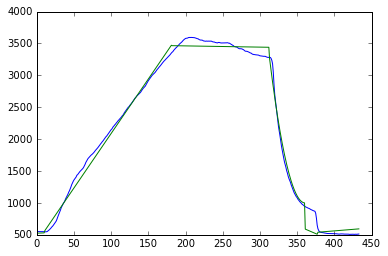

In [22]:
plt.figure()
plt.plot(y_list)
plt.plot(curve2_vals(optimal_params, y_list))

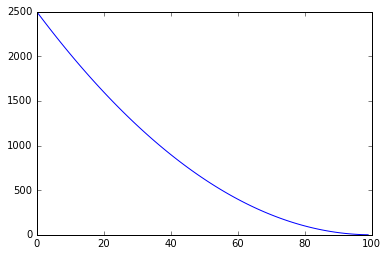

In [23]:
data = [(x/2)**2 for x in range(-100, 0)]
plt.figure()
plt.plot(data)

In [24]:
import math
math.sqrt(3000)

54.772255750516614